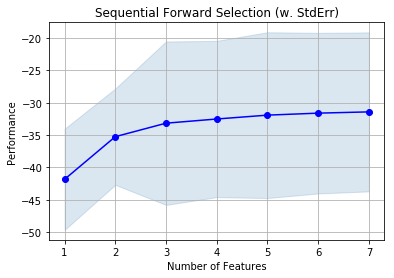

Selected features: (0, 3, 4, 5, 7, 10, 12)


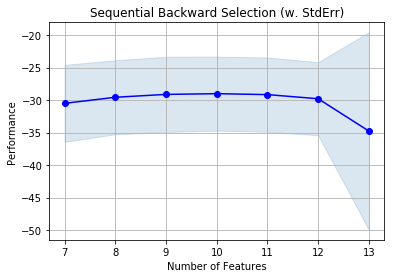

Selected features: (1, 4, 7, 8, 9, 10, 12)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SBS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sbs
import matplotlib.pyplot as plt
import pandas as pd

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()
sfs = SFS(lr, 
          k_features=7, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
print('Selected features:', sfs.k_feature_idx_)






sbs = SBS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',cv=10
          )

sbs = sbs.fit(X, y)
fig = plot_sbs(sbs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()
print('Selected features:', sbs.k_feature_idx_)

In [42]:
p=list(sbs.k_feature_idx_)
q=list(sfs.k_feature_idx_)
r=list(set(p+q))
r


[0, 1, 3, 4, 5, 7, 8, 9, 10, 12]